In [1]:
import logging, os 
logging.disable(logging.WARNING) 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from models import aae_cnn
from models import vae
from matplotlib import pyplot as plt


import numpy as np
from sklearn.model_selection import train_test_split

folder_name = 'tiny_set'
channels = ['CO', 'O2', 'CO2', 'Qdot', 'CH4', 'T', 'H2O', 'U1', 'U3']

path_to_data_raw = 'data/IR/raw/'
path_to_data = 'data/IR/normalised/'
labels_raw = np.genfromtxt(path_to_data_raw + 'labels.csv', delimiter=';')
min_label = np.genfromtxt(path_to_data + 'labels_min.csv')
max_label = np.genfromtxt(path_to_data + 'labels_max.csv')
labels = np.genfromtxt(path_to_data + 'labels.csv', delimiter=';')

channel_variable = 'CO'
model = aae_cnn.AAE(folder_name)


In [2]:
new_data = np.genfromtxt(path_to_data + '{}.csv'.format(channel_variable), delimiter=';')
new_data = np.reshape(new_data, (-1, 81, 241, 1))
#X_train, X_test, label_train, label_test = train_test_split(new_data, labels[index], test_size=0.05, random_state=10)
X_train, X_test, label_train, label_test = train_test_split(new_data, labels, test_size=0.05, random_state=10)
X_train, X_val, label_train, label_val = train_test_split(X_train, label_train, test_size=0.75, random_state=10)

In [ ]:
_, _, _, _ = model.fit(channel_variable, X_train, X_test, label_train, label_test)

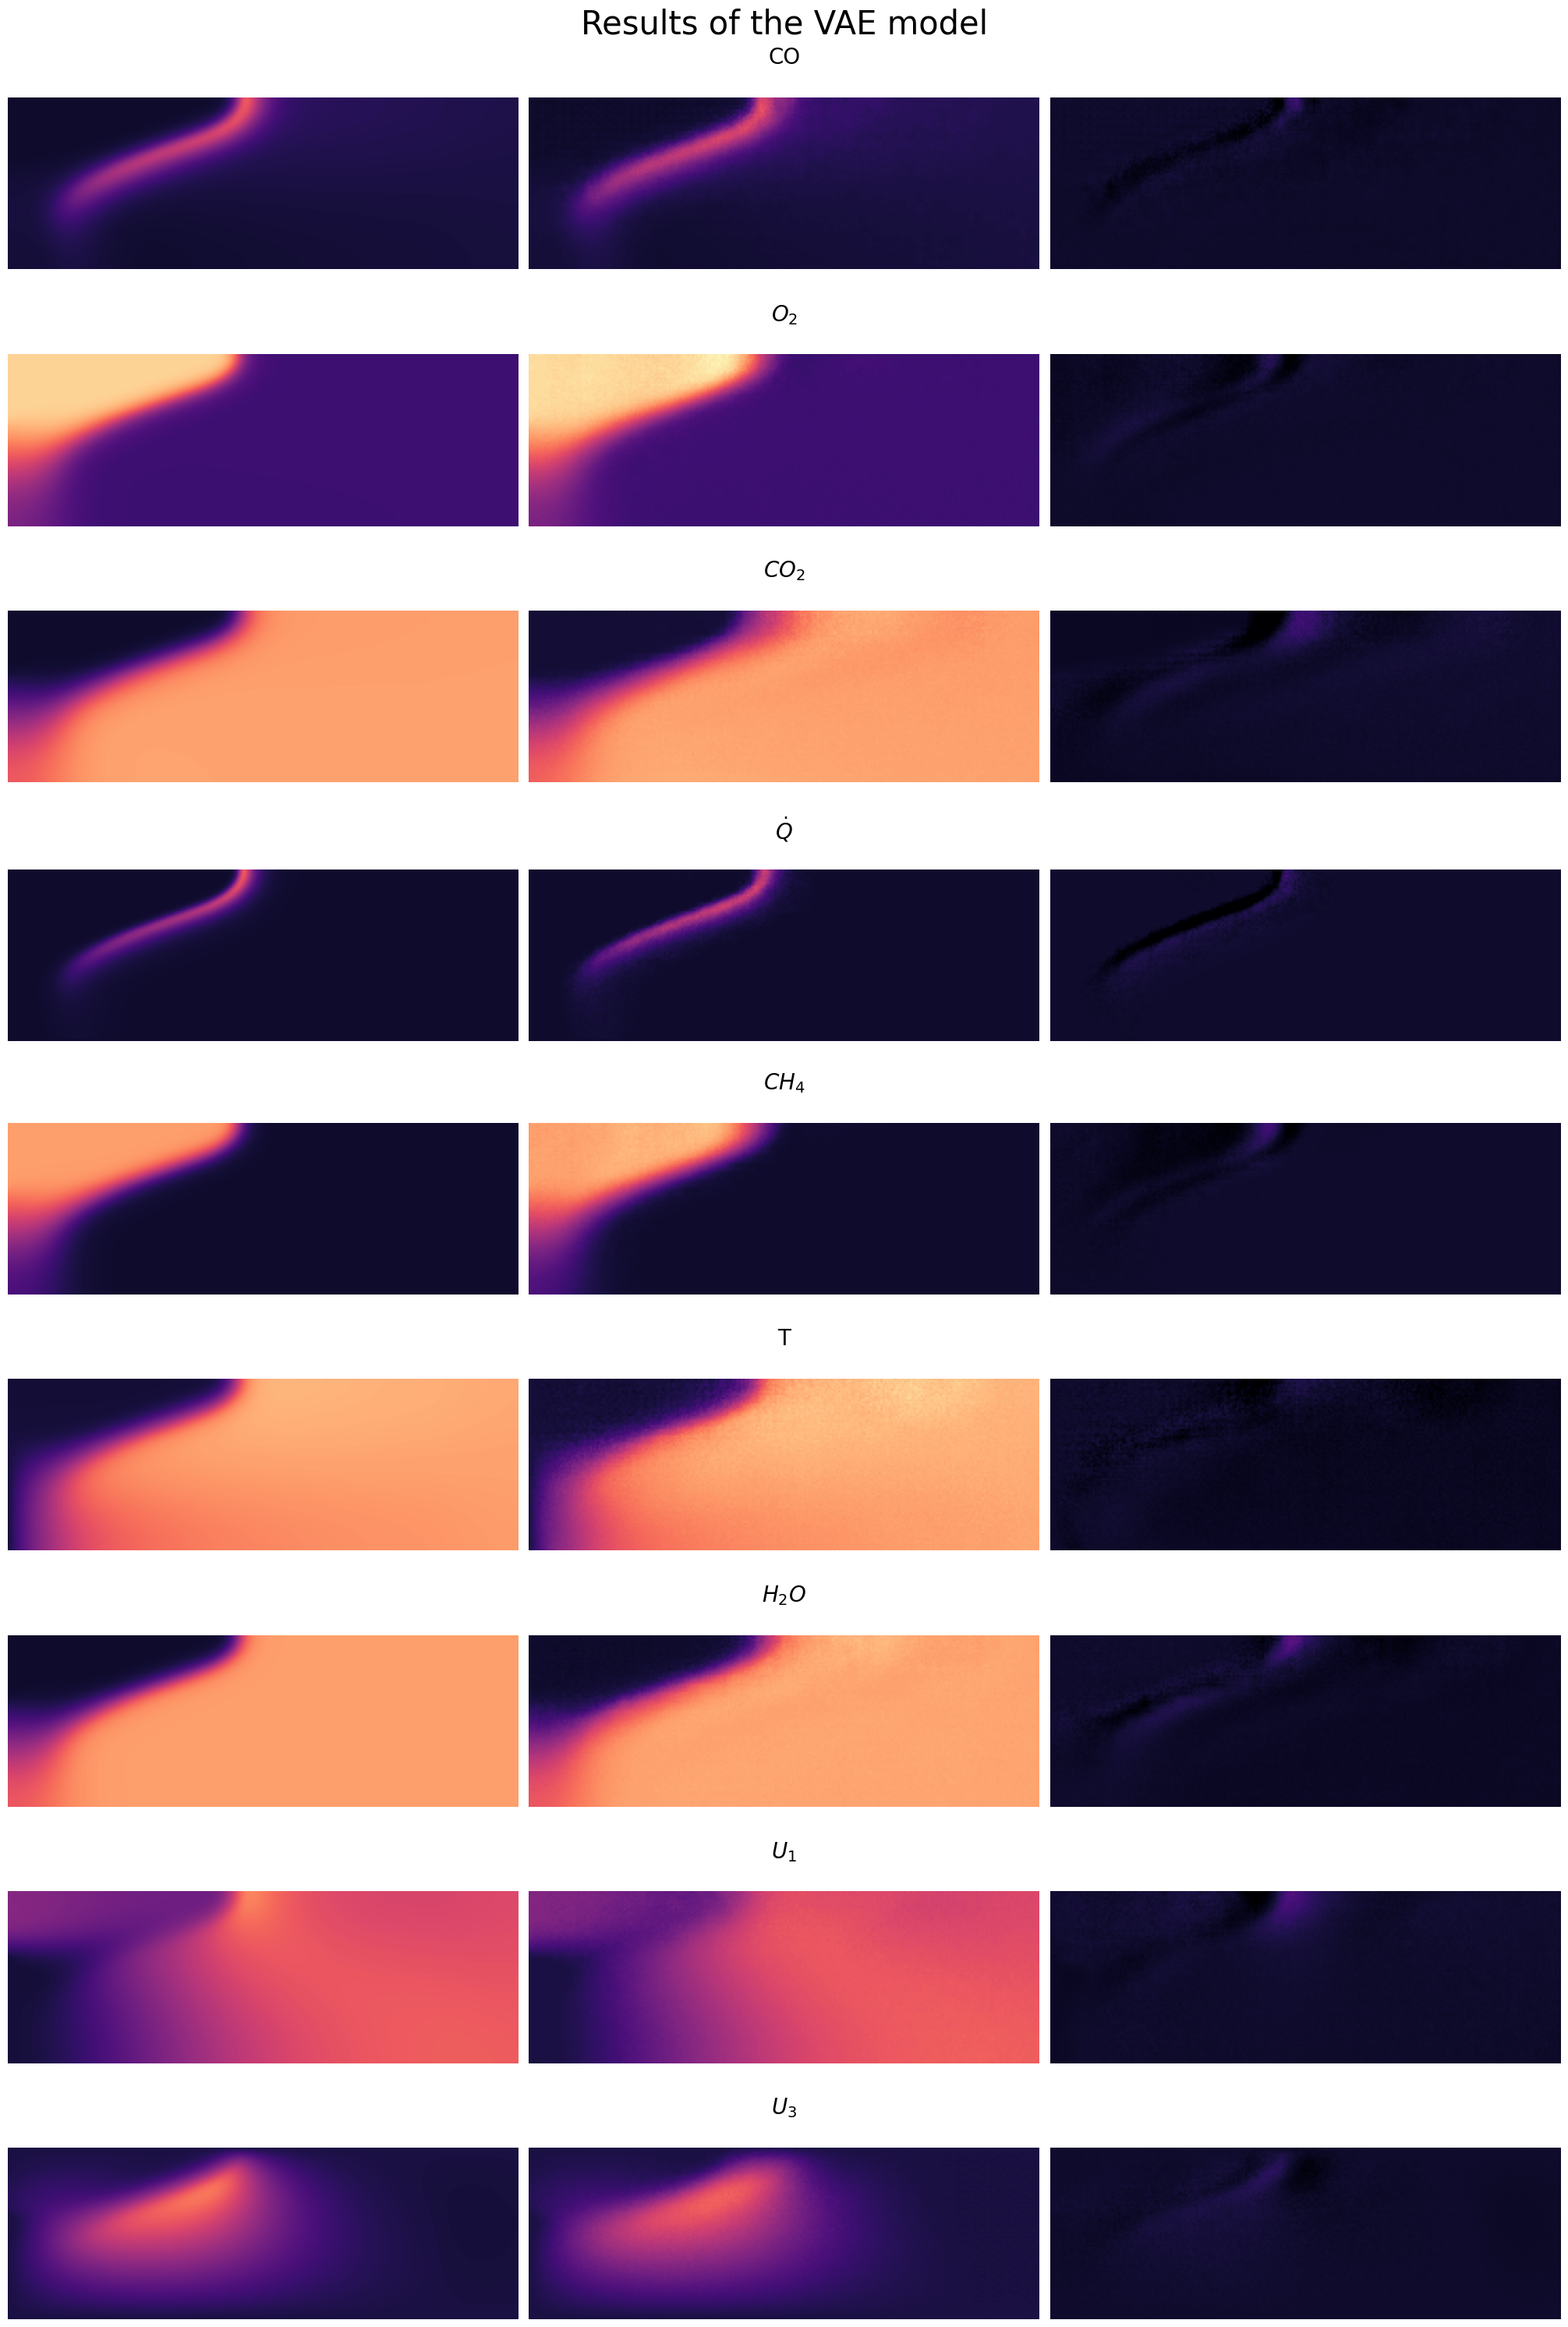

In [5]:
import random
image = random.randint(0, 50)
fig = plt.figure(figsize=(20, 30), constrained_layout=True)
fig.suptitle('Results of the VAE model', fontsize = 30)
labels_raw = np.genfromtxt(path_to_data_raw + 'labels.csv', delimiter=';')
channels_latex = ['CO', r'$O_2$', r'$CO_2$', r'$\dot{Q}$', r'$CH_4$', 'T', r'$H_{2}O$', r'$U_1$', r'$U_3$']
channels = ['CO', 'O2', 'CO2', 'Qdot', 'CH4', 'T', 'H2O', 'U1', 'U3']

error_dict = {}
subfigs = fig.subfigures(nrows = len(channels), ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(channels_latex[row], fontsize=20)
    new_data = np.genfromtxt(path_to_data + '{}.csv'.format(channels[row]), delimiter=';')
    new_data = np.reshape(new_data, (-1, 81, 241, 1))
    X_train, X_test, label_train, label_test = train_test_split(new_data, labels, test_size=0.05, random_state=10)
    X_train, X_test, label_train, label_test = train_test_split(new_data, labels, test_size=0.5, random_state=10)
    simulation = np.reshape(X_test[image], (81, 241))
    prediction = np.reshape(model.predict_from_labels(label_test, channels[row])[image], (81, 241))
    error_dict[channels[row]] = np.sum((simulation - prediction)**2)**.5
    
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        if col == 0:
            ax.imshow(simulation,cmap = 'magma', vmin = -0.1, vmax = 1.1)
            ax.set_axis_off()
            if row == len(channels): ax.set_title('Numeric simulation')
        if col == 1:
            ax.imshow(prediction,cmap = 'magma', vmin = -0.1, vmax = 1.1)
            ax.set_axis_off()
            if row == len(channels): ax.set_title('ML prediction')
        if col == 2:
            ax.imshow(simulation - prediction,cmap = 'magma', vmin = -0.1, vmax = 1.1)
            ax.set_axis_off()
            if row == len(channels): ax.set_title('Difference of simulation and prediction')
